In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb


# Data loading & pre-processing

In [8]:
from arff2pandas import a2p

def load(file):
    df = pd.read_csv(file)
    return df

In [18]:
df = load('spambase/spambase.data')
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_bracket,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [32]:
def impute_missing_values(df):
    from sklearn.impute import SimpleImputer
    imp = SimpleImputer(missing_values=np.NaN)
    idf = pd.DataFrame(imp.fit_transform(df))
    idf.columns = df.columns
    idf.index = df.index
    return idf

def split_df(df):
    from sklearn.model_selection import train_test_split
    df = impute_missing_values(df)
    
    X = df[df.columns[:-1]]
    Y = df[df.columns[-1]]
    return train_test_split(X,Y)

# Data Analysis

In [93]:
df.groupby("spam").size().reset_index(name='counts')

,spam,counts
0,0,2788
1,1,1813


There are 2788 non-spam emails and 1813 spam emails in the dataset.

Index(['word_freq_makespam', 'word_freq_addressspam', 'word_freq_allspam'], dtype='object')

In [125]:
sb.pairplot(df, hue="spam")

KeyboardInterrupt: 

# Looking for the best model
## Random Forest Classifier

In [72]:
def grid_search(df, classifier, parameters):
    from sklearn.model_selection   import GridSearchCV
    from sklearn.metrics           import make_scorer
    from sklearn.preprocessing     import label_binarize
    from sklearn.multiclass        import OneVsRestClassifier

    
    df = impute_missing_values(df)
    X = df[df.columns[:-1]]
    Y = df[df.columns[-1]]
    
    grid = GridSearchCV(classifier, parameters, verbose=1)
    
    try: grid.fit(X, Y)
    except Exception as e : print(e)
    print({"best score:": grid.best_score_, "best estimator:": grid.best_estimator_, "best_params": grid.best_params_})
    #print (" best_score_ %s with =  %s params : %s"%( grid.best_score_,  grid.best_estimator_, grid.best_params_ ) ); sys.stdout.flush()    
    return grid.best_estimator_


In [73]:
from sklearn.ensemble import RandomForestClassifier
parameters = {  "n_estimators"         : [ 10, 15, 20, 30 ], 
                    "min_samples_leaf"     : [  3,   1,   7 ],
                    "criterion"            : ["gini"],#["gini", "entropy"]         ,
                    "max_features"         : ["auto"]      ,
                    "max_depth"            : [None]         , 
                    "n_jobs"               : [ -1]             ,  
                    "class_weight"         : ["balanced"]          ,
                    "warm_start"           : [False]           }
grid_search(df, RandomForestClassifier(), parameters)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'best score:': 0.9300120379549639, 'best estimator:': RandomForestClassifier(class_weight='balanced', n_estimators=30, n_jobs=-1), 'best_params': {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 30, 'n_jobs': -1, 'warm_start': False}}


RandomForestClassifier(class_weight='balanced', n_estimators=30, n_jobs=-1)

In [35]:
def random_forest(df):
    from sklearn.ensemble import RandomForestClassifier

    x_train, x_test, y_train, y_test = split_df(df)
    
    algo   = RandomForestClassifier()
    modele = algo.fit(x_train, y_train)
    print(modele.score(x_test, y_test))
    return modele

modele = random_forest(df)

import joblib
joblib.dump(modele, 'api/randomforest.pkl', compress=9)

0.9591659426585578


['api/randomforest.pkl']

In [46]:
def confusion_mat(model, x_test, y_test):
    from sklearn.metrics import confusion_matrix
    
    predictions = model.predict(x_test)
    mat = confusion_matrix(y_test, predictions)
    print(mat)
    #figure = plt.subplot()
    #plt.heatmap(mat, annot = True)
    
    #figure.set_xlabel('Prediction')
    #figure.set_ylabel('Real value')
    #figure.xaxis.set_ticklabels(['0', '1']);
    #figure.yaxis.set_ticklabels(['0', '1'])

## Logistic regression

In [47]:
def logistic_reg(df):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_fscore_support
    from sklearn.metrics import classification_report

    x_train, x_test, y_train, y_test = split_df(df)
    
    logistic_regression = LogisticRegression()
    logistic_regression.fit(x_train, y_train)
    logistic_prediction = logistic_regression.predict(x_test)
    print(classification_report(y_test, logistic_prediction))
    
    confusion_mat(logistic_regression, x_test, y_test)
    
logistic_reg(df)

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       692
         1.0       0.88      0.87      0.87       459

    accuracy                           0.90      1151
   macro avg       0.90      0.89      0.89      1151
weighted avg       0.90      0.90      0.90      1151

[[635  57]
 [ 59 400]]


/usr/local/Cellar/jupyterlab/3.0.0_1/libexec/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## XGB Classifier

In [75]:
def xgb(df):
    from xgboost import XGBClassifier
    
    x_train, x_test, y_train, y_test = split_df(df)
    
    algo   = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    modele = algo.fit(x_train, y_train)
    print(modele.score(x_test, y_test))
    confusion_mat(modele, x_test, y_test)
    return modele

modele = xgb(df)
joblib.dump(modele, 'api/xgb.pkl', compress=9)

0.9582971329278888
[[689  19]
 [ 29 414]]


['api/xgb.pkl']

## Catboost Classifier

In [89]:
def catboost(df):
    from catboost import CatBoostClassifier
    
    x_train, x_test, y_train, y_test = split_df(df)
    
    algo   = CatBoostClassifier()
    modele = algo.fit(x_train, y_train)
    print(modele.score(x_test, y_test))
    confusion_mat(modele, x_test, y_test)

catboost(df)

Learning rate set to 0.017482
0:	learn: 0.6727120	total: 19.1ms	remaining: 19.1s
1:	learn: 0.6511752	total: 25.6ms	remaining: 12.8s
2:	learn: 0.6309908	total: 30.2ms	remaining: 10s
3:	learn: 0.6126770	total: 34.1ms	remaining: 8.5s
4:	learn: 0.5981155	total: 38.9ms	remaining: 7.73s
5:	learn: 0.5840383	total: 43.2ms	remaining: 7.15s
6:	learn: 0.5695131	total: 47.6ms	remaining: 6.75s
7:	learn: 0.5538817	total: 52.2ms	remaining: 6.47s
8:	learn: 0.5410956	total: 57.5ms	remaining: 6.33s
9:	learn: 0.5257086	total: 61.1ms	remaining: 6.04s
10:	learn: 0.5132100	total: 65ms	remaining: 5.84s
11:	learn: 0.5006795	total: 69.4ms	remaining: 5.71s
12:	learn: 0.4881152	total: 73.8ms	remaining: 5.61s
13:	learn: 0.4756537	total: 78ms	remaining: 5.49s
14:	learn: 0.4649159	total: 82.7ms	remaining: 5.43s
15:	learn: 0.4565790	total: 86.5ms	remaining: 5.32s
16:	learn: 0.4477257	total: 90.3ms	remaining: 5.22s
17:	learn: 0.4380396	total: 94.8ms	remaining: 5.17s
18:	learn: 0.4285445	total: 99.8ms	remaining: 5.15s

186:	learn: 0.1405825	total: 988ms	remaining: 4.3s
187:	learn: 0.1402398	total: 993ms	remaining: 4.29s
188:	learn: 0.1400201	total: 1000ms	remaining: 4.29s
189:	learn: 0.1397395	total: 1.01s	remaining: 4.3s
190:	learn: 0.1394458	total: 1.01s	remaining: 4.29s
191:	learn: 0.1392165	total: 1.02s	remaining: 4.28s
192:	learn: 0.1391353	total: 1.02s	remaining: 4.27s
193:	learn: 0.1388794	total: 1.03s	remaining: 4.27s
194:	learn: 0.1386355	total: 1.03s	remaining: 4.26s
195:	learn: 0.1383957	total: 1.04s	remaining: 4.27s
196:	learn: 0.1382509	total: 1.05s	remaining: 4.29s
197:	learn: 0.1379045	total: 1.06s	remaining: 4.29s
198:	learn: 0.1377412	total: 1.06s	remaining: 4.28s
199:	learn: 0.1376184	total: 1.07s	remaining: 4.27s
200:	learn: 0.1374420	total: 1.07s	remaining: 4.26s
201:	learn: 0.1371846	total: 1.08s	remaining: 4.25s
202:	learn: 0.1368229	total: 1.08s	remaining: 4.24s
203:	learn: 0.1365400	total: 1.08s	remaining: 4.23s
204:	learn: 0.1362663	total: 1.09s	remaining: 4.22s
205:	learn: 0

379:	learn: 0.1086854	total: 1.98s	remaining: 3.24s
380:	learn: 0.1085818	total: 1.99s	remaining: 3.23s
381:	learn: 0.1085348	total: 1.99s	remaining: 3.23s
382:	learn: 0.1083272	total: 2s	remaining: 3.22s
383:	learn: 0.1082313	total: 2s	remaining: 3.21s
384:	learn: 0.1081073	total: 2.01s	remaining: 3.21s
385:	learn: 0.1080604	total: 2.01s	remaining: 3.2s
386:	learn: 0.1080129	total: 2.02s	remaining: 3.19s
387:	learn: 0.1078863	total: 2.02s	remaining: 3.19s
388:	learn: 0.1077173	total: 2.02s	remaining: 3.18s
389:	learn: 0.1076650	total: 2.03s	remaining: 3.17s
390:	learn: 0.1075728	total: 2.03s	remaining: 3.16s
391:	learn: 0.1074868	total: 2.04s	remaining: 3.16s
392:	learn: 0.1073046	total: 2.04s	remaining: 3.15s
393:	learn: 0.1072175	total: 2.04s	remaining: 3.14s
394:	learn: 0.1071047	total: 2.05s	remaining: 3.14s
395:	learn: 0.1070632	total: 2.05s	remaining: 3.13s
396:	learn: 0.1070278	total: 2.06s	remaining: 3.12s
397:	learn: 0.1069044	total: 2.06s	remaining: 3.11s
398:	learn: 0.10671

548:	learn: 0.0935652	total: 2.78s	remaining: 2.28s
549:	learn: 0.0934556	total: 2.78s	remaining: 2.28s
550:	learn: 0.0934115	total: 2.79s	remaining: 2.27s
551:	learn: 0.0933756	total: 2.79s	remaining: 2.27s
552:	learn: 0.0931850	total: 2.8s	remaining: 2.26s
553:	learn: 0.0931773	total: 2.8s	remaining: 2.25s
554:	learn: 0.0931669	total: 2.81s	remaining: 2.25s
555:	learn: 0.0930500	total: 2.81s	remaining: 2.24s
556:	learn: 0.0929968	total: 2.81s	remaining: 2.24s
557:	learn: 0.0929538	total: 2.82s	remaining: 2.23s
558:	learn: 0.0928564	total: 2.82s	remaining: 2.23s
559:	learn: 0.0927843	total: 2.82s	remaining: 2.22s
560:	learn: 0.0927322	total: 2.83s	remaining: 2.21s
561:	learn: 0.0926790	total: 2.83s	remaining: 2.21s
562:	learn: 0.0926700	total: 2.84s	remaining: 2.2s
563:	learn: 0.0925199	total: 2.84s	remaining: 2.2s
564:	learn: 0.0925071	total: 2.84s	remaining: 2.19s
565:	learn: 0.0923923	total: 2.85s	remaining: 2.18s
566:	learn: 0.0922334	total: 2.85s	remaining: 2.18s
567:	learn: 0.09

719:	learn: 0.0800815	total: 3.56s	remaining: 1.39s
720:	learn: 0.0800594	total: 3.57s	remaining: 1.38s
721:	learn: 0.0800081	total: 3.58s	remaining: 1.38s
722:	learn: 0.0799169	total: 3.58s	remaining: 1.37s
723:	learn: 0.0798725	total: 3.59s	remaining: 1.37s
724:	learn: 0.0797801	total: 3.59s	remaining: 1.36s
725:	learn: 0.0796207	total: 3.6s	remaining: 1.36s
726:	learn: 0.0795839	total: 3.6s	remaining: 1.35s
727:	learn: 0.0795455	total: 3.6s	remaining: 1.35s
728:	learn: 0.0795037	total: 3.61s	remaining: 1.34s
729:	learn: 0.0794283	total: 3.61s	remaining: 1.34s
730:	learn: 0.0792861	total: 3.62s	remaining: 1.33s
731:	learn: 0.0791944	total: 3.62s	remaining: 1.32s
732:	learn: 0.0791246	total: 3.62s	remaining: 1.32s
733:	learn: 0.0790450	total: 3.63s	remaining: 1.31s
734:	learn: 0.0790239	total: 3.63s	remaining: 1.31s
735:	learn: 0.0789213	total: 3.64s	remaining: 1.3s
736:	learn: 0.0787990	total: 3.64s	remaining: 1.3s
737:	learn: 0.0787478	total: 3.64s	remaining: 1.29s
738:	learn: 0.078

880:	learn: 0.0703150	total: 4.36s	remaining: 589ms
881:	learn: 0.0702333	total: 4.37s	remaining: 584ms
882:	learn: 0.0700611	total: 4.37s	remaining: 579ms
883:	learn: 0.0700106	total: 4.38s	remaining: 574ms
884:	learn: 0.0699740	total: 4.38s	remaining: 569ms
885:	learn: 0.0699699	total: 4.38s	remaining: 564ms
886:	learn: 0.0699441	total: 4.39s	remaining: 559ms
887:	learn: 0.0697907	total: 4.39s	remaining: 554ms
888:	learn: 0.0697654	total: 4.4s	remaining: 549ms
889:	learn: 0.0696483	total: 4.4s	remaining: 544ms
890:	learn: 0.0695559	total: 4.4s	remaining: 539ms
891:	learn: 0.0695523	total: 4.41s	remaining: 534ms
892:	learn: 0.0695058	total: 4.41s	remaining: 529ms
893:	learn: 0.0694804	total: 4.42s	remaining: 523ms
894:	learn: 0.0693669	total: 4.42s	remaining: 518ms
895:	learn: 0.0692361	total: 4.42s	remaining: 513ms
896:	learn: 0.0692163	total: 4.43s	remaining: 508ms
897:	learn: 0.0692123	total: 4.43s	remaining: 503ms
898:	learn: 0.0692020	total: 4.43s	remaining: 498ms
899:	learn: 0.0

KeyboardInterrupt: 

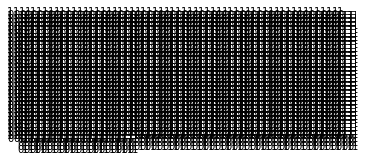

In [90]:
scatter_matrix = pd.plotting.scatter_matrix(df, alpha=0.2)